In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
nombres = open('nombres_dinosaurios.txt').read().lower().replace("\n", ".")
#nombres.replace
nombres

'aachenosaurus.aardonyx.abdallahsaurus.abelisaurus.abrictosaurus.abrosaurus.abydosaurus.acanthopholis.achelousaurus.acheroraptor.achillesaurus.achillobator.acristavus.acrocanthosaurus.acrotholus.actiosaurus.adamantisaurus.adasaurus.adelolophus.adeopapposaurus.aegyptosaurus.aeolosaurus.aepisaurus.aepyornithomimus.aerosteon.aetonyxafromimus.afrovenator.agathaumas.aggiosaurus.agilisaurus.agnosphitys.agrosaurus.agujaceratops.agustinia.ahshislepelta.airakoraptor.ajancingenia.ajkaceratops.alamosaurus.alaskacephale.albalophosaurus.albertaceratops.albertadromeus.albertavenator.albertonykus.albertosaurus.albinykus.albisaurus.alcovasaurus.alectrosaurus.aletopelta.algoasaurus.alioramus.aliwalia.allosaurus.almas.alnashetri.alocodon.altirhinus.altispinax.alvarezsaurus.alwalkeria.alxasaurus.amargasaurus.amargastegos.amargatitanis.amazonsaurus.ammosaurus.ampelosaurus.amphicoelias.amphicoelicaudia.amphisaurus.amtocephale.amtosaurus.amurosaurus.amygdalodon.anabisetia.anasazisaurus.anatosaurus.anatotita

In [3]:
vocabulario = sorted(list(set(nombres)))
len_datos, len_vocabulario = len(nombres), len(vocabulario)
print(f"Vocabulario: {''.join(vocabulario)}")
print(f"lg datos: {len_datos}   lg vocab: {len_vocabulario}")

Vocabulario: .abcdefghijklmnopqrstuvwxyz
lg datos: 19909   lg vocab: 27


In [4]:
stoi = {ch:i for i,ch in enumerate(vocabulario)}
print(stoi)
itos = {i:ch for i,ch in enumerate(vocabulario)}
print(itos)

{'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
{0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [5]:
N = np.zeros((len_vocabulario, len_vocabulario), dtype=np.int32)
for i in range(len_vocabulario):
    for j in range(len_vocabulario):
        bigrama = itos[i]+itos[j]
        N[i,j] = nombres.count(bigrama)

In [6]:
len_datos = len(nombres)
for i in range(len_datos-1):
    bigrama = nombres[i] + nombres[i+1]
    fila = stoi[nombres[i]]
    col = stoi[nombres[i+1]]
    N[fila, col] += 1

N

array([[   0,  330,  150,  218,  162,  130,   42,  122,  128,   48,   52,
          80,  164,  182,   96,   82,  250,   20,   80,  292,  198,   36,
          42,   34,   32,   48,   52],
       [ 276,   22,   48,  200,   72,   84,   12,   80,   34,   46,   10,
          40,  276,  136,  694,   44,  178,    6,  248,  342,  408, 1582,
          60,   12,   24,   24,   16],
       [   0,   82,    4,    0,    6,   66,    0,    0,    0,   44,    0,
           0,   10,    0,    0,   34,    0,    0,   52,    4,    0,   28,
           0,    0,    0,   12,    0],
       [   0,  124,    0,    4,    0,  232,    0,    0,  332,   42,    0,
           4,   22,    0,    6,  168,    0,    0,   74,    4,   34,   32,
           0,    0,    0,    0,    0],
       [   2,   86,    0,    4,    2,   74,    0,    0,    8,   80,    0,
           0,    0,    6,    2,  258,    0,    0,   84,    4,    0,   22,
           0,    2,    0,   46,    2],
       [  28,   24,    8,   48,   26,   10,    4,   48,   12,   8

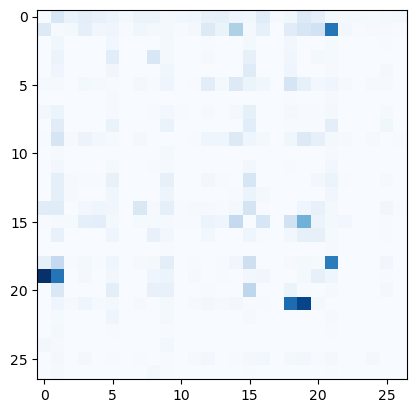

In [7]:
plt.imshow(N, cmap="Blues")

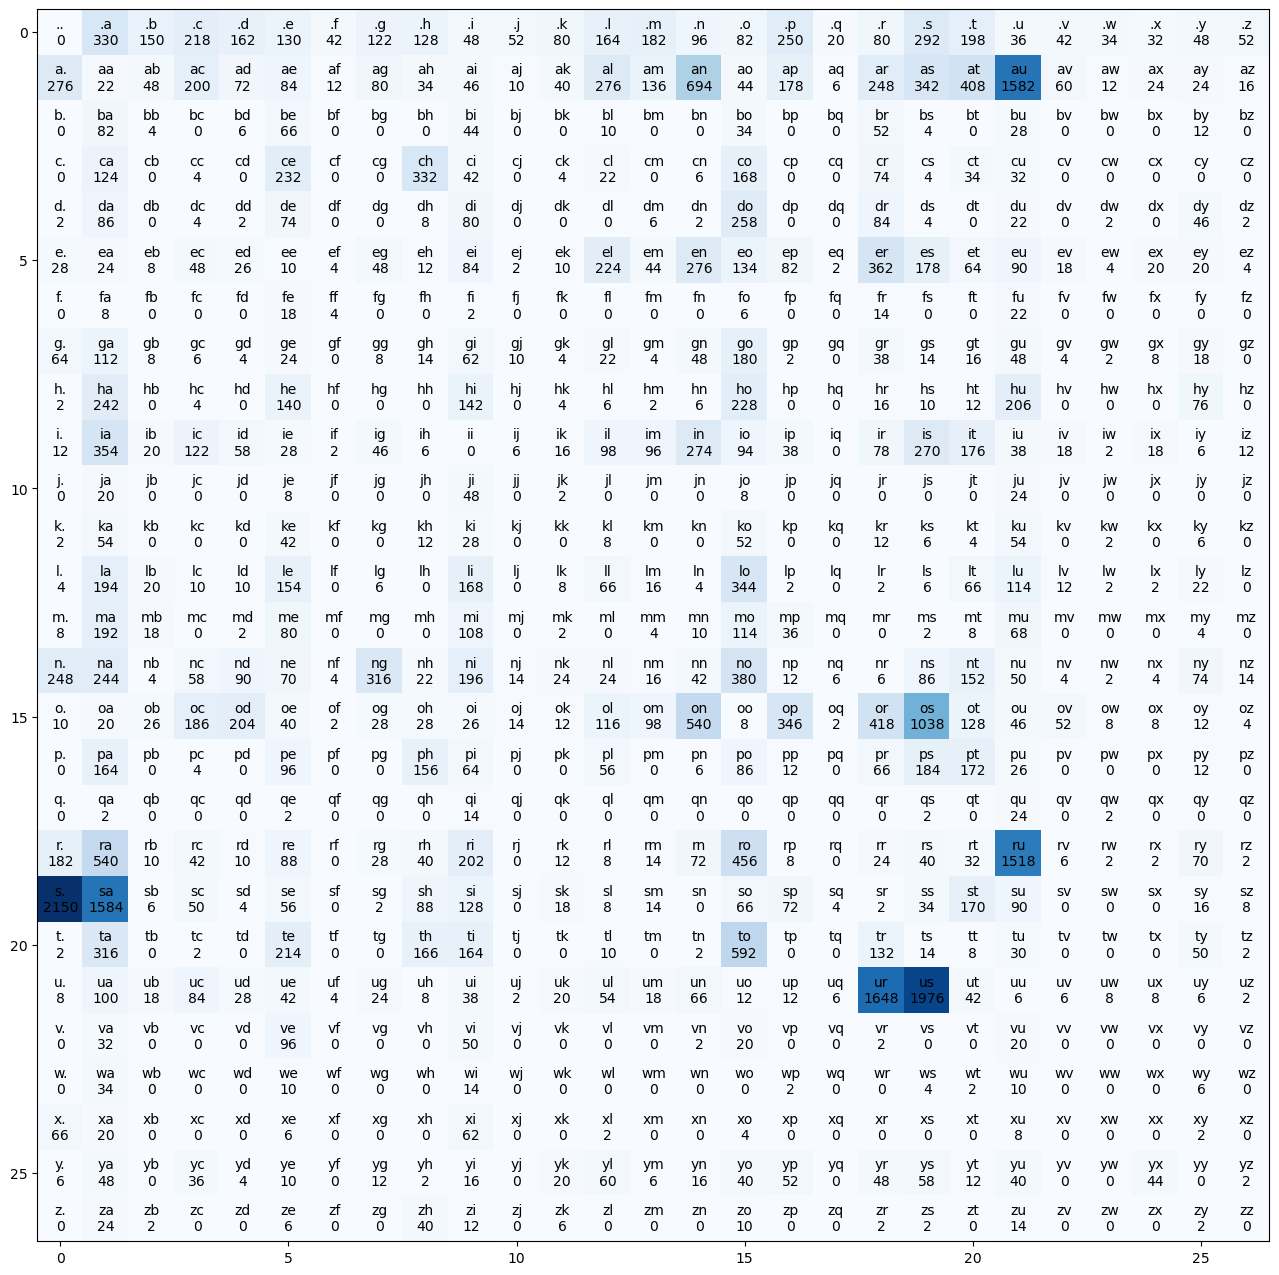

In [8]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap="Blues")
for i in range(len_vocabulario):
    for j in range(len_vocabulario):
        bigrama = itos[i]+itos[j]
        txt = bigrama + "\n" + str(N[i,j])
        plt.text(j, i, txt, ha = "center", va = "center")

In [11]:
N[0]/N[0].sum()

array([0.        , 0.10749186, 0.04885993, 0.07100977, 0.05276873,
       0.04234528, 0.01368078, 0.03973941, 0.04169381, 0.01563518,
       0.01693811, 0.02605863, 0.0534202 , 0.05928339, 0.03127036,
       0.0267101 , 0.08143322, 0.00651466, 0.02605863, 0.09511401,
       0.06449511, 0.01172638, 0.01368078, 0.01107492, 0.01042345,
       0.01563518, 0.01693811])

Para saber la probabilidad de cada combinación de palabras se realiza la siguiente operación por cada fila: **fila/sumatorio de la fila**

In [27]:
P = (N.astype(float) + 1)/(1 + N.sum(axis=1, keepdims=True))
P

array([[3.25626832e-04, 1.07782481e-01, 4.91696516e-02, 7.13122761e-02,
        5.30771736e-02, 4.26571149e-02, 1.40019538e-02, 4.00521003e-02,
        4.20058613e-02, 1.59557148e-02, 1.72582221e-02, 2.63757734e-02,
        5.37284272e-02, 5.95897102e-02, 3.15858027e-02, 2.70270270e-02,
        8.17323347e-02, 6.83816346e-03, 2.63757734e-02, 9.54086617e-02,
        6.47997395e-02, 1.20481928e-02, 1.40019538e-02, 1.13969391e-02,
        1.07456854e-02, 1.59557148e-02, 1.72582221e-02],
       [5.56783920e-02, 4.62311558e-03, 9.84924623e-03, 4.04020101e-02,
        1.46733668e-02, 1.70854271e-02, 2.61306533e-03, 1.62814070e-02,
        7.03517588e-03, 9.44723618e-03, 2.21105528e-03, 8.24120603e-03,
        5.56783920e-02, 2.75376884e-02, 1.39698492e-01, 9.04522613e-03,
        3.59798995e-02, 1.40703518e-03, 5.00502513e-02, 6.89447236e-02,
        8.22110553e-02, 3.18190955e-01, 1.22613065e-02, 2.61306533e-03,
        5.02512563e-03, 5.02512563e-03, 3.41708543e-03],
       [2.91545190e-03

In [35]:
z = P[0]
r = random.choices(range(27), weights=z, k=1)
r

[1]

> Generador de nombres de dinosaurios nuevos

In [44]:
for _ in range(10):    
    salida = []
    ix = stoi["."]
    while True:
        z = P[ix]
        ix = random.choices(range(27), weights=z, k=1)[0]
        salida.append(itos[ix])
        if ix == 0: break
    print("".join(salida))

megurinangonges.
almons.
saurus.
bobrururcepiloronojan.
drus.
zhicobankxe.
ps.
oppeps.
mesas.
dysilavisceweusaupliruropausheus.


In [45]:
l = ["a", "b", "c"]
kp = [0.8, 0.1, 0.1]
for _ in range(10):
    h = random.choices(l, kp, k=1)
    print(h)

['a']
['a']
['a']
['a']
['a']
['a']
['a']
['a']
['a']
['b']


Evalúo una letra según mi modelo la probabilidad y la métrica; verosimilitud -> likelihood. Multiplicar todos y dividir por n para que sea dividido por la cantidad de letras y no se distorione según la longitud de la palabra.

In [48]:
txt = "uan"
likelihood = 1
for i in range(len(txt)-1):
  ch1 = txt[i];     i1 = stoi[ch1]
  ch2 = txt[i+1];   i2 = stoi[ch1]
  p = P[i1, i2]
  likelihood = likelihood*p
  print(f"{ch1}{ch2} -> {p}")
likelihood = likelihood/len(txt)
print(f"metrica: {likelihood}")

ua -> 0.0016482222745467388
an -> 0.004623115577889447
metrica: 2.539974024427135e-06


El mismo pero con logaritmos, la ventaja de esta utilización es que simplemente se va sumando.

In [50]:
txt = "uan"
log_likelihood = 0
for i in range(len(txt)-1):
  ch1 = txt[i];     i1 = stoi[ch1]
  ch2 = txt[i+1];   i2 = stoi[ch2]
  p = P[i1, i2]
  log_likelihood += np.log(p)
  print(f"{ch1}{ch2} -> {p}")
log_likelihood = log_likelihood/len(txt)
print(f"metrica nll: {-log_likelihood}")

ua -> 0.02378149281846009
an -> 0.13969849246231156
metrica nll: 1.9023721391666377
